In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Load the data
data = pd.read_csv('100 Sales Records.csv')
data = pd.DataFrame(data)
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [3]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [4]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [5]:
data = data.astype({'Ship Date' : 'datetime64[ns]','Order Date' : 'datetime64[ns]'})
data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

<Axes: >

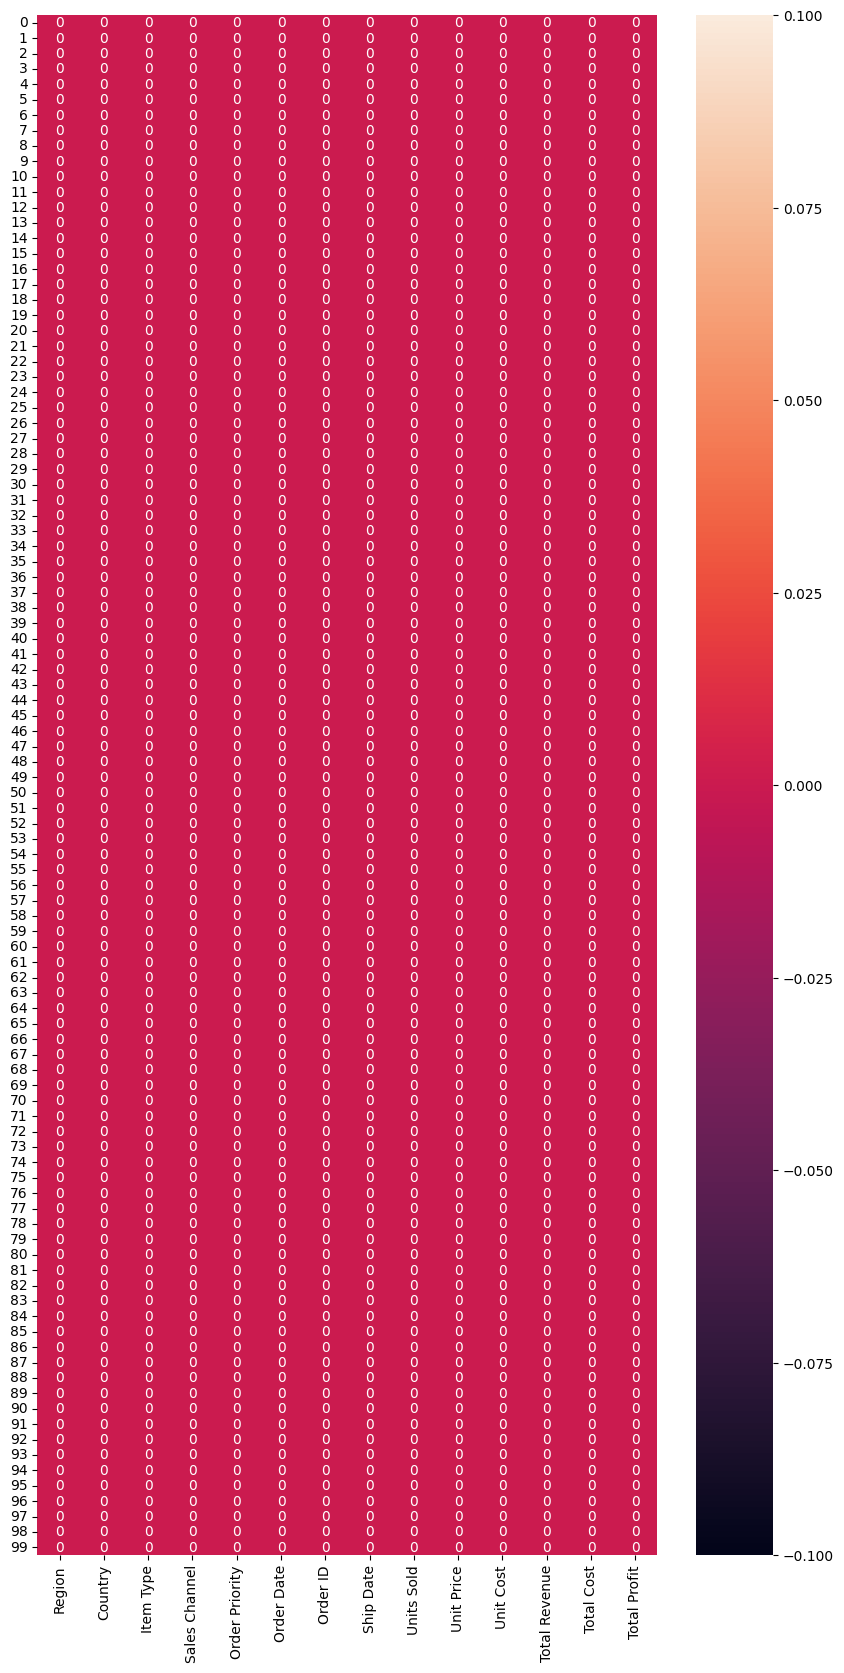

In [6]:
plt.figure(figsize = (10,20))
sns.heatmap(data.isnull(), annot = True)

In [7]:
data['Total Cost']= data['Total Cost'].astype('Float64')
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.5,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02


## Which region has the highest total revenue?

In [8]:
# Which region has the highest total revenue?
Highest_Total_Revenue = data.groupby(data['Region'])['Total Revenue'].sum()
Highest_Total_Revenue.idxmax()

'Sub-Saharan Africa'

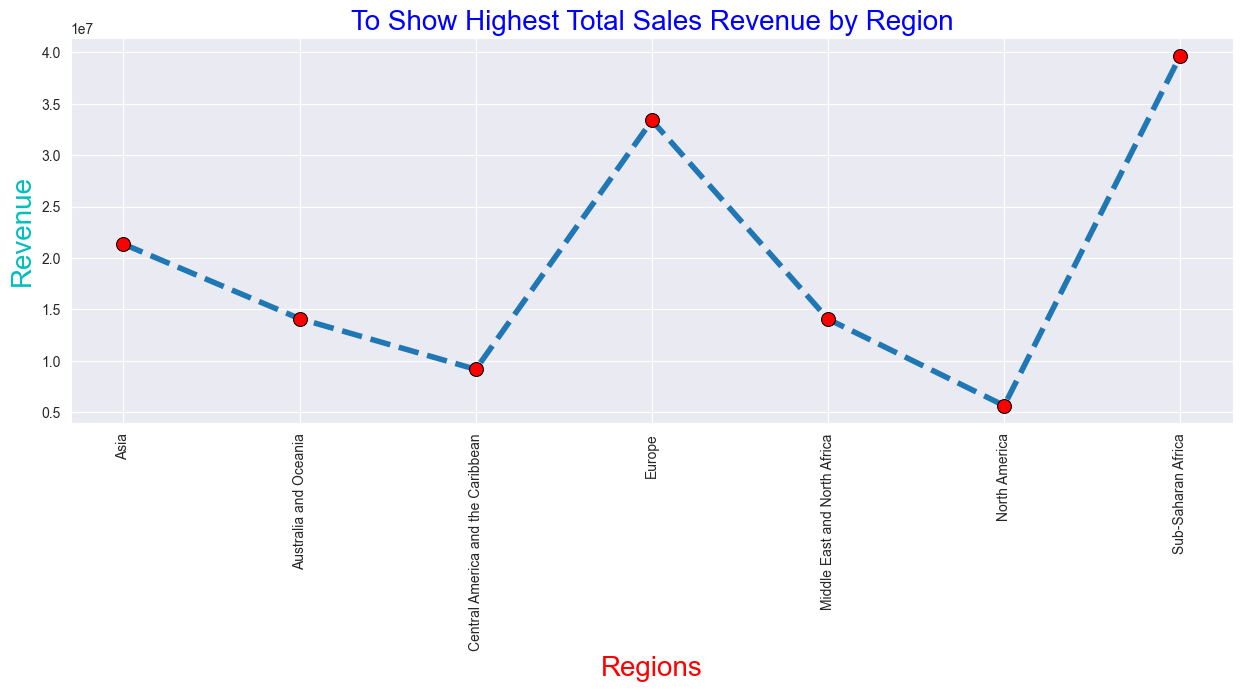

In [9]:
group_data = data.groupby(data['Region'])['Total Revenue'].sum()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.lineplot(data = group_data, linestyle = '--' ,linewidth = 4 , marker = 'o', markersize = 10, 
             markerfacecolor ='red', markeredgecolor ='black')

plt.xticks(rotation = 90)
plt.title('To Show Highest Total Sales Revenue by Region', fontsize = 20, color = 'Blue')
plt.xlabel('Regions', fontsize = 20, color = 'red')
plt.ylabel('Revenue', fontsize = 20, color = 'c')
plt.show()

## What is the average unit price and unit cost for each item type?

In [10]:
# What is the average unit price and unit cost for each item type?
Item_Type_Avg_Price = data.groupby(data['Item Type'])['Unit Price'].mean()
Item_Type_Avg_Cost = data.groupby(data['Item Type'])['Unit Cost'].mean()

Avg_Price_Cost = pd.DataFrame({'Average Unit Price' : Item_Type_Avg_Price, 'Average Unit Cost' : Item_Type_Avg_Cost})
Avg_Price_Cost

,Average Unit Price,Average Unit Cost
Item Type,,
Baby Food,255.28,159.42
Beverages,47.45,31.79
Cereal,205.70,117.11
Clothes,109.28,35.84
Cosmetics,437.20,263.33
Fruits,9.33,6.92
Household,668.27,502.54
Meat,421.89,364.69
Office Supplies,651.21,524.96


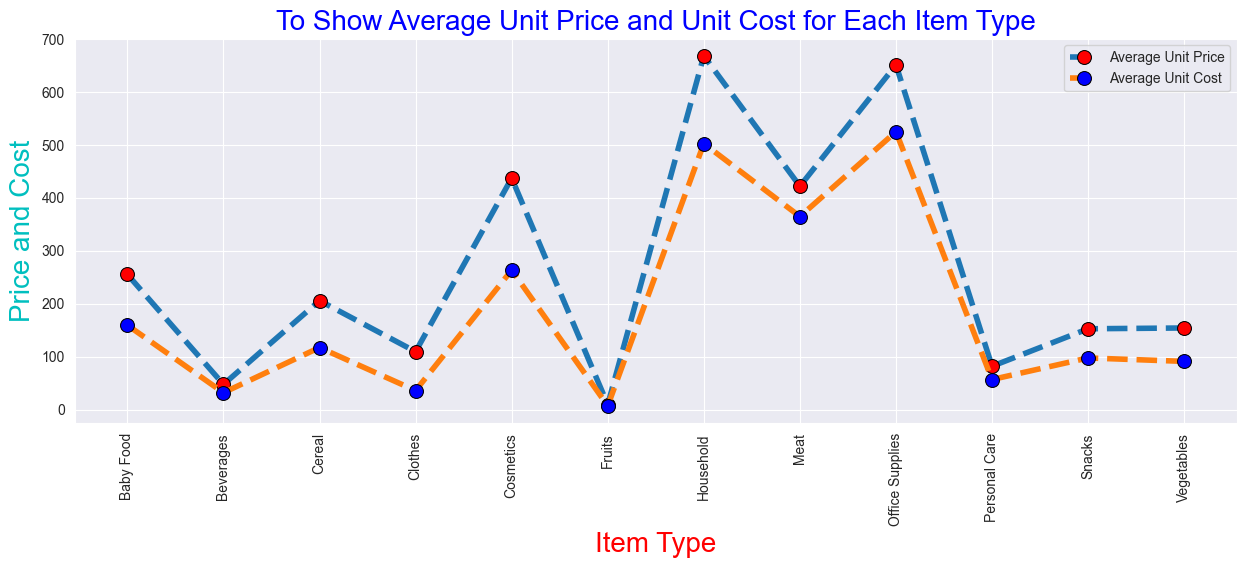

In [11]:
group_data_unit_price = data.groupby(data['Item Type'])['Unit Price'].mean()
group_data_unit_cost = data.groupby(data['Item Type'])['Unit Cost'].mean()

plt.figure(figsize = (15,5))
sns.lineplot(data = group_data_unit_price, linestyle = '--' ,linewidth = 4 , marker = 'o', markersize = 10,
                markerfacecolor ='red', markeredgecolor ='black', label = 'Average Unit Price')
sns.lineplot(data = group_data_unit_cost, linestyle = '--' ,linewidth = 4 , marker = 'o', markersize = 10,
                markerfacecolor ='blue', markeredgecolor ='black', label = 'Average Unit Cost')

plt.xticks(rotation = 90)
plt.title('To Show Average Unit Price and Unit Cost for Each Item Type', fontsize = 20, color = 'Blue')
plt.xlabel('Item Type', fontsize = 20, color = 'red')
plt.ylabel('Price and Cost', fontsize = 20, color = 'c')
plt.legend()
plt.show()

## Which country has the highest total profit?

In [12]:
# Which country has the highest total profit?
Highest_Total_Profit = data.groupby(data['Country'])['Total Profit'].sum()
Highest_Total_Profit.idxmax()

'Djibouti'

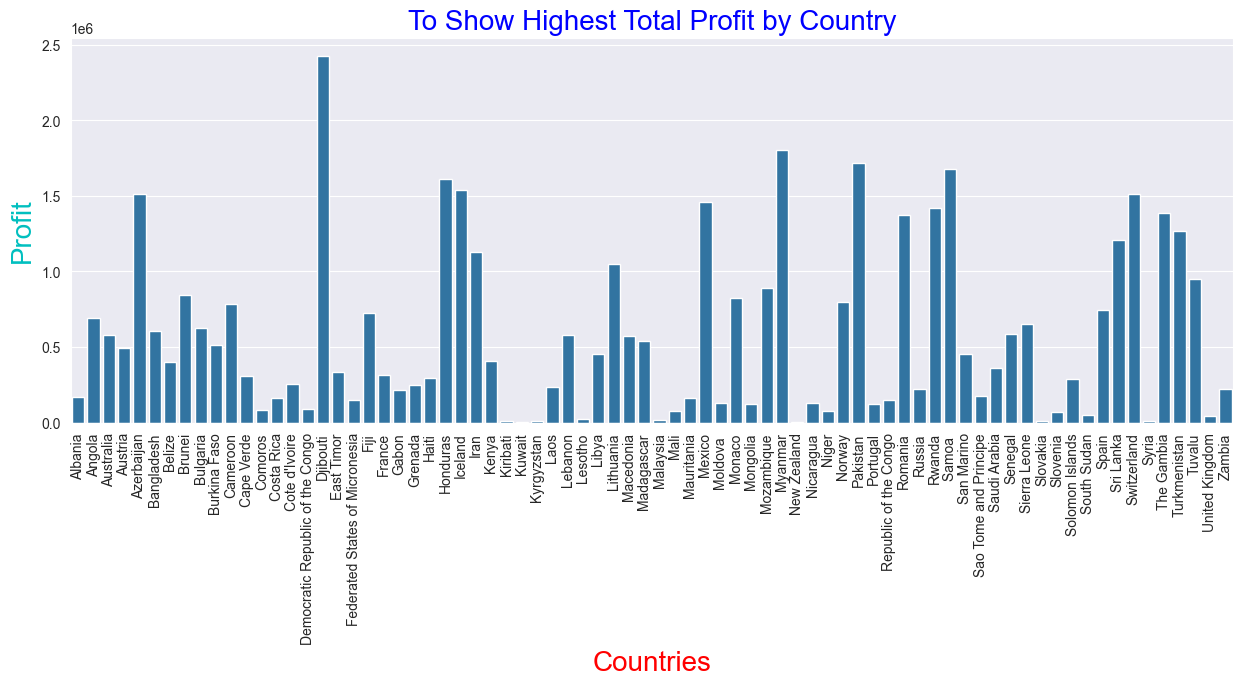

In [13]:
group_data = data.groupby(data['Country'])['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Highest Total Profit by Country', fontsize = 20, color = 'Blue')
plt.xlabel('Countries', fontsize = 20, color = 'red')
plt.ylabel('Profit', fontsize = 20, color = 'c')
plt.show()


## How does the sales channel affect the order priority distribution?

In [14]:
# How does the sales channel affect the order priority distribution?
Sales_Channel_Order_Priority = data.groupby(data['Sales Channel'])['Order Priority'].value_counts().unstack()
Sales_Channel_Order_Priority

Order Priority,C,H,L,M
Sales Channel,,,,
Offline,13,17,12,8
Online,9,13,15,13


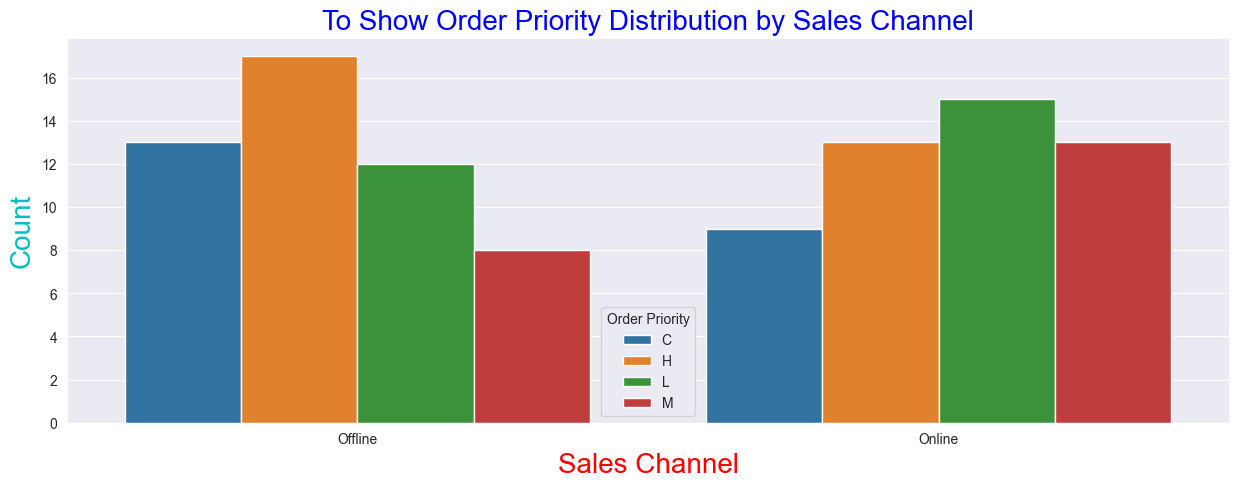

In [15]:
group_data = data.groupby(['Sales Channel', 'Order Priority'])['Order Priority'].count().reset_index(name = 'Count')

plt.figure(figsize=(15,5))
sns.barplot(x = 'Sales Channel', y = 'Count', hue = 'Order Priority', data = group_data)

plt.title('To Show Order Priority Distribution by Sales Channel', fontsize = 20, color = 'Blue')
plt.xlabel('Sales Channel', fontsize = 20, color = 'red')
plt.ylabel('Count', fontsize = 20, color = 'c')
plt.show()

## Which regions generate the highest and lowest total profits?

In [16]:
# Which regions generate the highest and lowest total profits?
Highest_Total_Profit = data.groupby(data['Region'])['Total Profit'].sum()
Highest_Total_Profit.idxmax()

'Sub-Saharan Africa'

In [17]:
Lowest_Total_Profit = data.groupby(data['Region'])['Total Profit'].sum()
Lowest_Total_Profit.idxmin()

'North America'

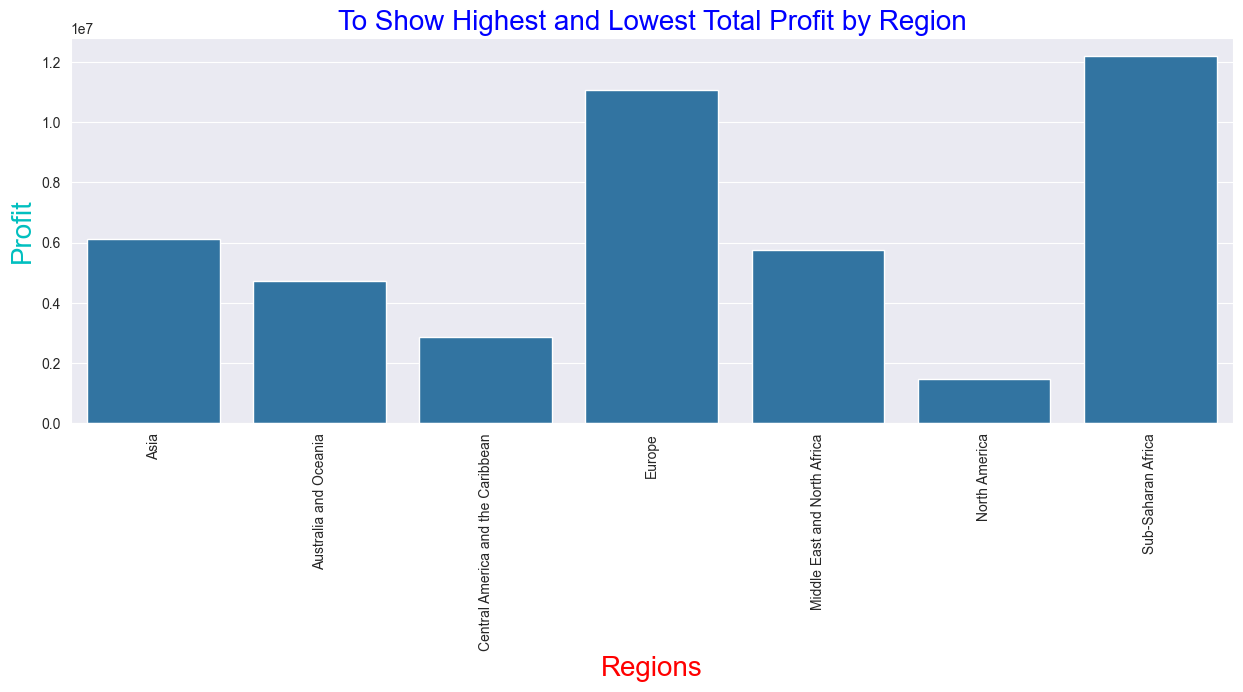

In [18]:
group_data = data.groupby(data['Region'])['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Highest and Lowest Total Profit by Region', fontsize = 20, color = 'Blue')
plt.xlabel('Regions', fontsize = 20, color = 'red')
plt.ylabel('Profit', fontsize = 20, color = 'c')
plt.show()

## What are the top 5 countries in terms of total revenue?

In [19]:
# What are the top 5 countries in terms of total revenue?
Top_5_Countries = data.groupby(['Country'])['Total Revenue'].sum().nlargest(5).reset_index(name = 'Total Revenue')
Top_5_Countries

,Country,Total Revenue
0,Honduras,6336545.48
1,Myanmar,6161257.90
2,Djibouti,6052890.86
3,Turkmenistan,5822036.20
4,Mexico,5643356.55


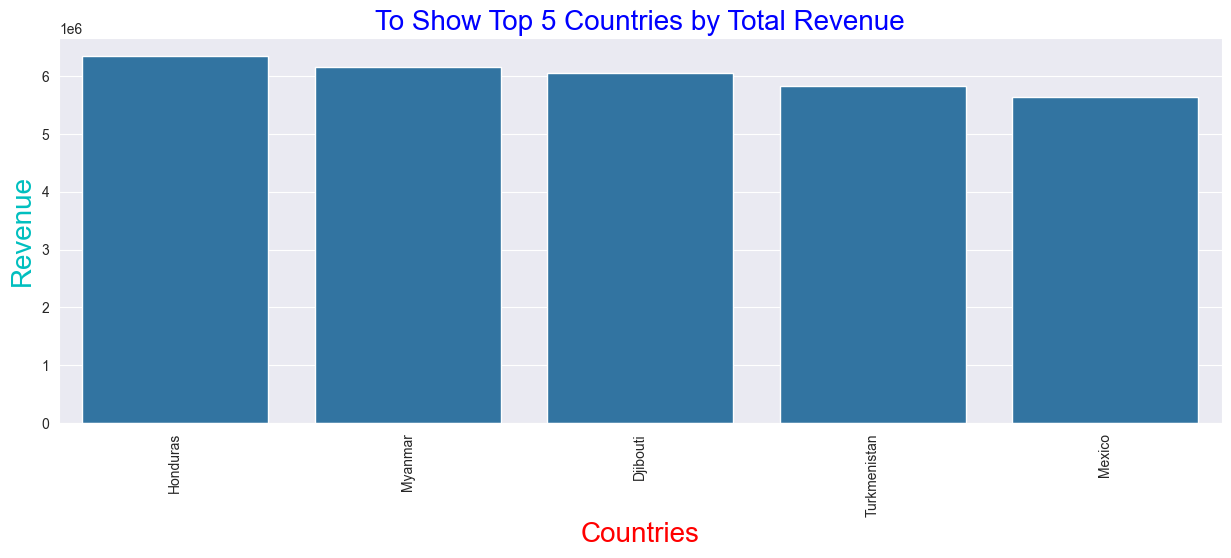

In [20]:
group_data = data.groupby(['Country'])['Total Revenue'].sum().nlargest(5)
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Top 5 Countries by Total Revenue', fontsize = 20, color = 'Blue')
plt.xlabel('Countries', fontsize = 20, color = 'red')
plt.ylabel('Revenue', fontsize = 20, color = 'c')
plt.show()

## Which item type contributes most to total profit across all regions?

In [21]:
# Which item type contributes most to total profit across all regions?
Item_Type_Contributes = data.groupby(['Item Type'])['Total Profit'].sum().nlargest(1).reset_index(name = 'Total Profit')
Item_Type_Contributes

,Item Type,Total Profit
0,Cosmetics,14556048.66


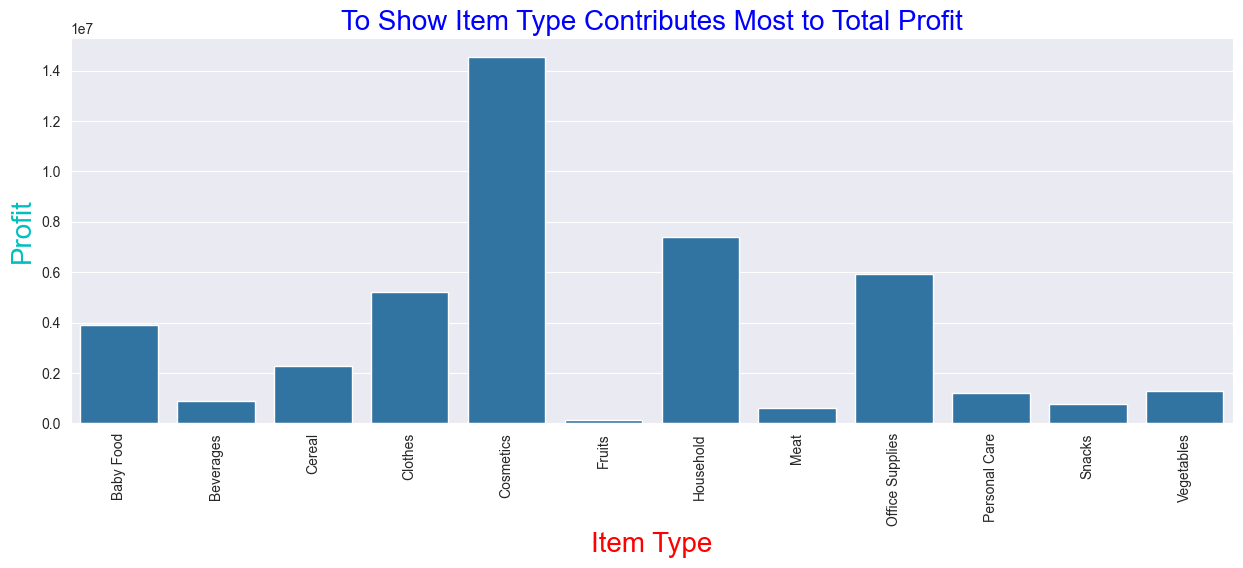

In [22]:
group_data = data.groupby(['Item Type'])['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Item Type Contributes Most to Total Profit', fontsize = 20, color = 'Blue')
plt.xlabel('Item Type', fontsize = 20, color = 'red')
plt.ylabel('Profit', fontsize = 20, color = 'c')
plt.show()

## How does the sales channel (Online vs. Offline) impact total profit in Africa and Europe?

In [23]:
# How does the sales channel (Online vs. Offline) impact total profit in Africa and Europe?
Sales_Channel_Total_Profit = data.groupby(['Region', 'Sales Channel'])['Total Profit'].sum().unstack()
Sales_Channel_Total_Profit

Sales Channel,Offline,Online
Region,,
Asia,3584286.33,2529559.54
Australia and Oceania,1886283.82,2835876.21
Central America and the Caribbean,2475814.99,371092.86
Europe,5574539.91,5508398.72
Middle East and North Africa,2169081.08,3592110.78
North America,1457942.76,NaN
Sub-Saharan Africa,7772777.78,4410433.62


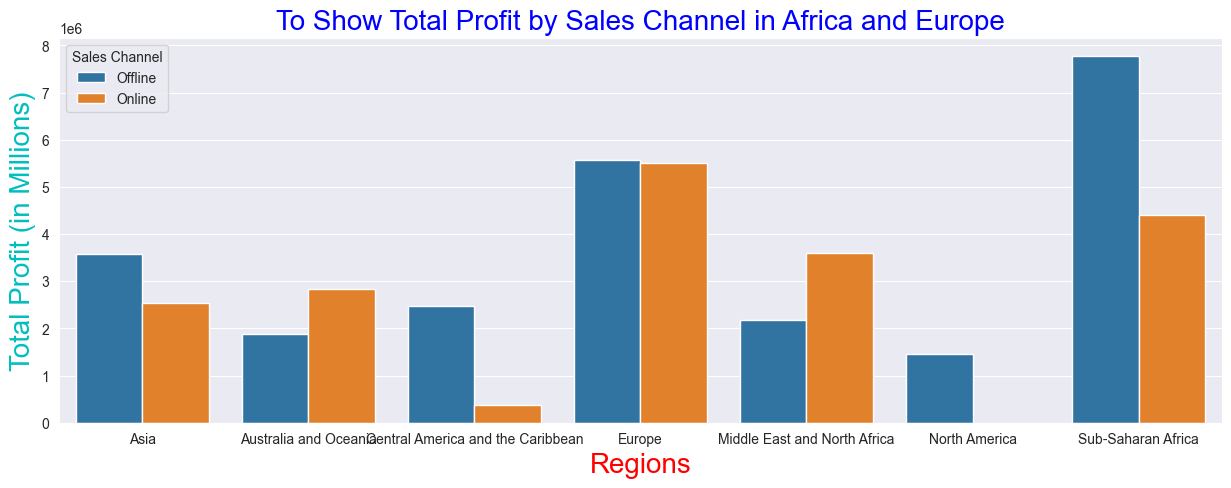

In [24]:
group_data = data.groupby(['Region', 'Sales Channel'])['Total Profit'].sum().reset_index(name = 'Total Profit (in Millions)')
plt.figure(figsize = (15,5))
sns.barplot(x = 'Region', y = 'Total Profit (in Millions)', hue = 'Sales Channel', data = group_data)

plt.title('To Show Total Profit by Sales Channel in Africa and Europe', fontsize = 20, color = 'Blue')
plt.xlabel('Regions', fontsize = 20, color = 'red')
plt.ylabel('Total Profit (in Millions)', fontsize = 20, color = 'c')
plt.show()

## Is there a significant difference in profits based on order priority levels (e.g., High vs. Low)?

In [25]:
# Is there a significant difference in profits based on order priority levels (e.g., High vs. Low)?
Order_Priority_Profit = data.groupby(['Order Priority'])['Total Profit'].sum().reset_index(name = 'Total Profit')
Order_Priority_Profit

,Order Priority,Total Profit
0,C,6748328.46
1,H,16891599.58
2,L,10858727.86
3,M,9669542.50


## Is there a correlation between units sold and total profit?

In [26]:
# Is there a correlation between units sold and total profit?
Units_Sold_Total_Profit = data[['Units Sold', 'Total Profit']]
# keep it two decimal places
Units_Sold_Total_Profit.corr()

,Units Sold,Total Profit
Units Sold,1.00000,0.56455
Total Profit,0.56455,1.00000


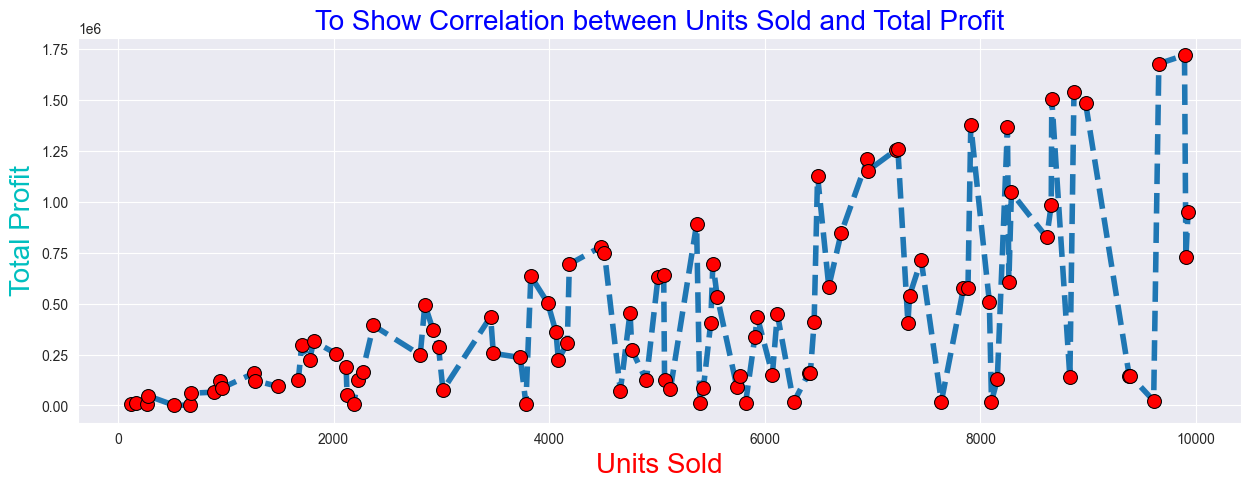

In [27]:
group_data = data.groupby(['Units Sold'])['Total Profit'].sum()
plt.figure(figsize=(15,5))
sns.lineplot(x = group_data.index, y = group_data.values, linestyle = '--' ,linewidth = 4 , marker = 'o', markersize = 10, 
             markerfacecolor ='red', markeredgecolor ='black')

plt.title('To Show Correlation between Units Sold and Total Profit', fontsize = 20, color = 'Blue')
plt.xlabel('Units Sold', fontsize = 20, color = 'red')
plt.ylabel('Total Profit', fontsize = 20, color = 'c')
plt.show()

## Which item types have the highest profit margins (profit as a percentage of revenue)?

In [28]:
# Which item types have the highest profit margins (profit as a percentage of revenue)?
data['Profit Margin'] = data['Total Profit'] / data['Total Revenue'] * 100
Item_Type_Profit_Margin = data.groupby(['Item Type'])['Profit Margin'].mean().reset_index(name = 'Profit Margin')
Item_Type_Profit_Margin

,Item Type,Profit Margin
0,Baby Food,37.550924
1,Beverages,33.003161
2,Cereal,43.067574
3,Clothes,67.203514
4,Cosmetics,39.768984
5,Fruits,25.830654
6,Household,24.799856
7,Meat,13.558036
8,Office Supplies,19.386987
9,Personal Care,30.661936


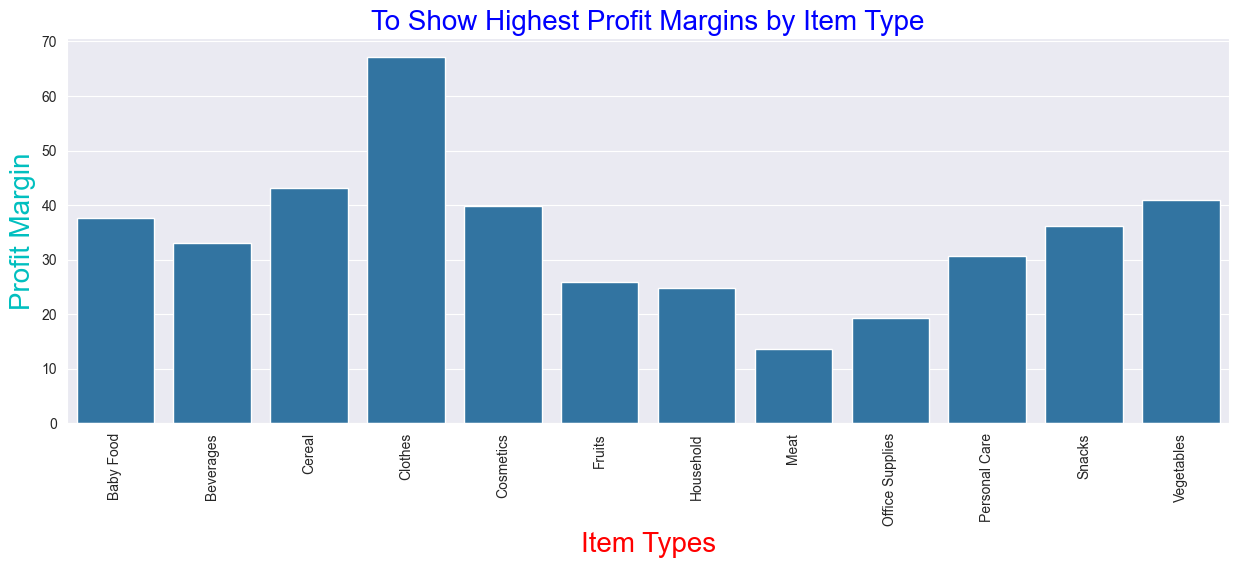

In [29]:
group_data = data.groupby(['Item Type'])['Profit Margin'].mean()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Highest Profit Margins by Item Type', fontsize = 20, color = 'Blue')
plt.xlabel('Item Types', fontsize = 20, color = 'red')
plt.ylabel('Profit Margin', fontsize = 20, color = 'c')
plt.show()

## How do unit prices vary across different regions?

In [30]:
# How do unit prices vary across different regions?
Unit_Prices_By_Region = data.groupby(['Region'])['Unit Price'].mean().reset_index(name = 'Mean Unit Price')
Unit_Prices_By_Region

,Region,Mean Unit Price
0,Asia,335.809091
1,Australia and Oceania,222.672727
2,Central America and the Caribbean,243.172857
3,Europe,328.979545
4,Middle East and North Africa,241.506000
5,North America,277.243333
6,Sub-Saharan Africa,259.618889


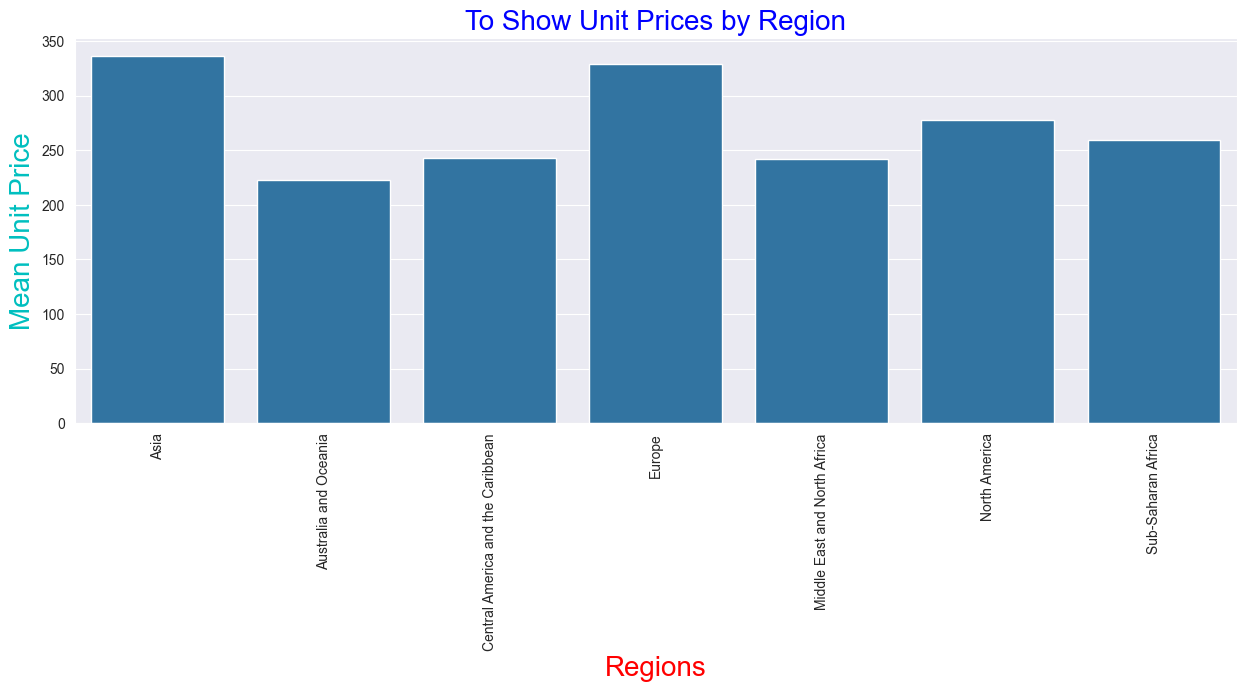

In [31]:
group_data = data.groupby(['Region'])['Unit Price'].mean()
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot(x = group_data.index, y = group_data.values)

plt.xticks(rotation = 90)
plt.title('To Show Unit Prices by Region', fontsize = 20, color = 'Blue')
plt.xlabel('Regions', fontsize = 20, color = 'red')
plt.ylabel('Mean Unit Price', fontsize = 20, color = 'c')
plt.show()

## Which regions and product types have the highest profit margins, and how does this vary across order priorities?

In [32]:
# Which regions and product types have the highest profit margins, and how does this vary across order priorities?
data['Profit Margin'] = data['Total Profit'] / data['Total Revenue'] * 100
Region_Product_Profit_Margin = data.groupby(['Region', 'Item Type', 'Order Priority'])['Profit Margin'].mean().unstack()
Region_Product_Profit_Margin

Order Priority                                             C          H  \
Region                            Item Type                               
Asia                              Clothes                NaN  67.203514   
                                  Cosmetics              NaN        NaN   
                                  Fruits                 NaN        NaN   
                                  Household              NaN  24.799856   
                                  Office Supplies        NaN        NaN   
                                  Personal Care    30.661936        NaN   
                                  Vegetables       40.977541  40.977541   
Australia and Oceania             Baby Food        37.550924  37.550924   
                                  Beverages        33.003161  33.003161   
                                  Cereal                 NaN  43.067574   
                                  Clothes          67.203514        NaN   
                                  Cosmetics              NaN  39.768984   
                                  Fruits                 NaN  25.830654   
                                  Meat                   NaN        NaN   
                                  Office Supplies  19.386987        NaN   
Central America and the Caribbean Beverages        33.003161        NaN   
                                  Cereal           43.067574        NaN   
                                  Clothes                NaN        NaN   
                                  Cosmetics              NaN  39.768984   
                                  Household              NaN  24.799856   
                                  Personal Care          NaN        NaN   
                                  Snacks                 NaN        NaN   
Europe                            Baby Food              NaN  37.550924   
                                  Beverages        33.003161        NaN   
                                  Clothes          67.203514        NaN   
                                  Cosmetics        39.768984  39.768984   
                                  Household              NaN        NaN   
                                  Office Supplies        NaN  19.386987   
                                  Personal Care          NaN        NaN   
                                  Vegetables             NaN  40.977541   
Middle East and North Africa      Cereal                 NaN        NaN   
                                  Clothes                NaN  67.203514   
                                  Cosmetics              NaN  39.768984   
                                  Fruits                 NaN        NaN   
                                  Office Supplies        NaN        NaN   
North America                     Household        24.799856        NaN   
                                  Personal Care          NaN        NaN   
Sub-Saharan Africa                Baby Food              NaN        NaN   
                                  Beverages        33.003161        NaN   
                                  Cereal                 NaN  43.067574   
                                  Clothes          67.203514  67.203514   
                                  Cosmetics              NaN  39.768984   
                                  Fruits           25.830654  25.830654   
                                  Household              NaN        NaN   
                                  Meat                   NaN        NaN   
                                  Office Supplies  19.386987  19.386987   
                                  Personal Care    30.661936  30.661936   
                                  Snacks                 NaN        NaN   
                                  Vegetables       40.977541  40.977541   

Order Priority                                             L          M  
Region                            Item Type                              
Asia                      

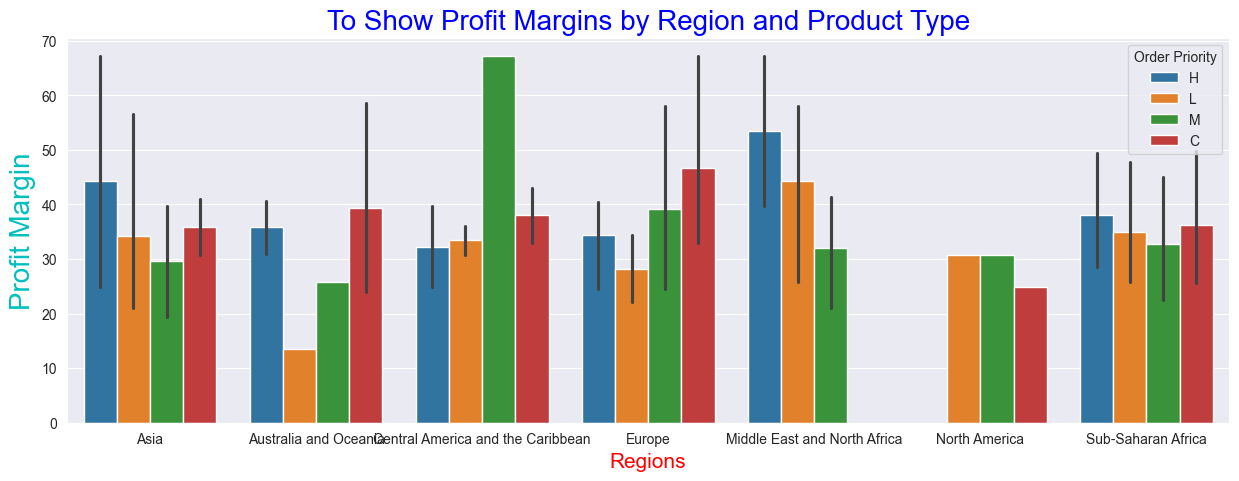

In [33]:
group_data = data.groupby(['Region', 'Item Type', 'Order Priority'])['Profit Margin'].mean().reset_index(name = 'Profit Margin')
plt.figure(figsize = (15,5))
sns.barplot(x = 'Region', y = 'Profit Margin', hue = 'Order Priority', data = group_data)

plt.title('To Show Profit Margins by Region and Product Type', fontsize = 20, color = 'Blue')
plt.xlabel('Regions', fontsize = 15, color = 'red')
plt.ylabel('Profit Margin', fontsize = 20, color = 'c')
plt.show()

## Can we predict the most profitable combination of country, item type, and sales channel, given the number of units sold and unit prices?

In [34]:
# Can we predict the most profitable combination of country, item type, and sales channel, given the number of units sold and unit prices?
data['Profit Margin'] = data['Total Profit'] / data['Total Revenue'] * 100
data['Region'] = data['Region'].astype('category')
data['Item Type'] = data['Item Type'].astype('category')
data['Sales Channel'] = data['Sales Channel'].astype('category')
data['Order Priority'] = data['Order Priority'].astype('category')

data.dtypes

Region                  category
Country                   object
Item Type               category
Sales Channel           category
Order Priority          category
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               Float64
Total Profit             float64
Profit Margin            float64
dtype: object

In [35]:
data = pd.get_dummies(data, columns = ['Region', 'Item Type', 'Sales Channel', 'Order Priority'], drop_first = True)
data

,Country,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,...,Item Type_Household,Item Type_Meat,Item Type_Office Supplies,Item Type_Personal Care,Item Type_Snacks,Item Type_Vegetables,Sales Channel_Online,Order Priority_H,Order Priority_L,Order Priority_M
0,Tuvalu,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.5,951410.50,...,False,False,False,False,False,False,False,True,False,False
1,Grenada,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,...,False,False,False,False,False,False,True,False,False,False
2,Russia,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,...,False,False,True,False,False,False,False,False,True,False
3,Sao Tome and Principe,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,...,False,False,False,False,False,False,True,False,False,False
4,Rwanda,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mali,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,...,False,False,False,False,False,False,True,False,False,True
96,Malaysia,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,...,False,False,False,False,False,False,False,False,True,False
97,Sierra Leone,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,...,False,False,False,False,False,True,False,False,False,False
98,Mexico,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,...,False,False,False,True,False,False,False,False,False,True


In [36]:
X = data.drop(['Total Profit', 'Total Revenue', 'Profit Margin', 'Ship Date', 'Order Date'], axis = 1)
y = data['Total Profit']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

r2_score(y_test, y_pred)

0.8105140906931028

In [38]:
# The model is not performing well. We can try other models like Random Forest, Decision Tree, etc. to improve the performance.
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

r2_score(y_test, y_pred)

0.9134364452988114

In [41]:
# The Random Forest model is performing better than the Linear Regression model. We can further tune the hyperparameters to improve the performance.
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

model = RandomForestRegressor(n_estimators = 300, max_depth = 30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

r2_score(y_test, y_pred)

0.9118045857773206

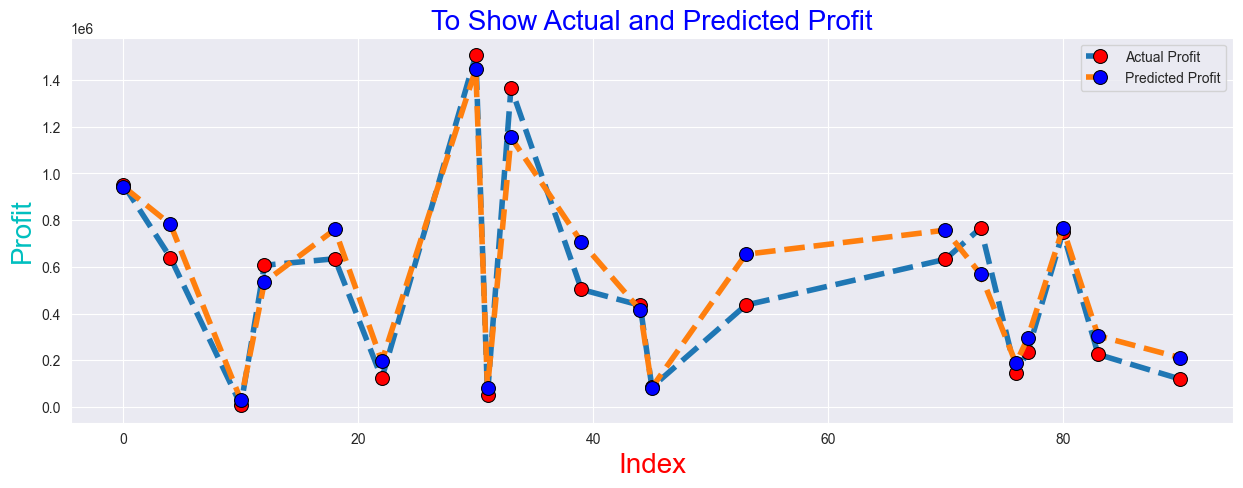

In [40]:
# The Random Forest model with hyperparameter tuning is performing better than the previous models. We can use this model to predict the most profitable combination of region, item type, and sales channel, given the number of units sold and unit prices.   
plt.figure(figsize = (15,5))

sns.lineplot(x = y_test.index, y = y_test.values, linestyle = '--' ,linewidth = 4 , marker = 'o', markersize = 10,
                markerfacecolor ='red', markeredgecolor ='black', label = 'Actual Profit')
sns.lineplot(x = y_test.index, y = y_pred, linestyle = '--' ,linewidth = 4 , marker = 'o', markersize = 10,
                markerfacecolor ='blue', markeredgecolor ='black', label = 'Predicted Profit')

plt.title('To Show Actual and Predicted Profit', fontsize = 20, color = 'Blue')
plt.xlabel('Index', fontsize = 20, color = 'red')
plt.ylabel('Profit', fontsize = 20, color = 'c')
plt.legend()
plt.show()